In [2]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [20]:
df = pd.read_csv('../FINAL DATASET/CVD/CVD_DA.csv')

In [21]:
df.head()
df=df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12,5,23,1,49,25,97,52,1
1,144,0,4,28,0,55,28,2,63,1
2,118,0,3,32,1,52,29,3,46,0
3,170,7,6,38,1,51,31,24,58,1
4,134,13,3,27,1,60,25,57,49,1


In [22]:
df['alcohol'].unique()

array([ 97,   2,   3,  24,  57,  14,   6,   0,  56,  30,  34,  13,  53,
        25,   1,  21,   5,   8,  12,  48,  36,  15,  22,   4,  38,  23,
        66,  54, 100,  10,  61,  20,  11,  43,  72,  33,   9,  28,  19,
       108,   7,  49,  27,  18,  29,  79,  58,  17,  32,  16, 147, 120,
        59,  26,  40,  74,  47, 109,  88,  82,  92,  37,  39,  64,  75,
        51,  85,  62,  42,  45,  78,  41, 145, 144,  65,  55,  90,  77],
      dtype=int64)

In [23]:
for i in df.index:
    df['alcohol'][i]=int((df['alcohol'][i]/37)+1)

<AxesSubplot:xlabel='alcohol', ylabel='count'>

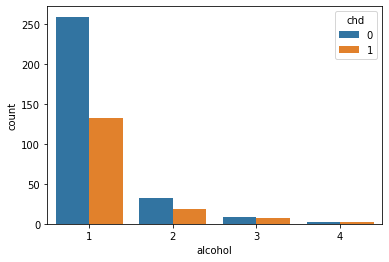

In [24]:
sns.countplot(x="alcohol", hue="chd", data=df)

In [30]:
import plotly.express as px
px.histogram(df, x="alcohol", color="chd")

In [35]:
ratio=[132/(259+132),19/(19+32),7/(7+9),2/4]

In [39]:
cnt =1
for i in ratio:
    print("Alcohol level "+str(cnt)+" People with No CVD "+ str(int((1-i)*100))+"%")
    cnt+=1

Alcohol level 1 People with No CVD 66%
Alcohol level 2 People with No CVD 62%
Alcohol level 3 People with No CVD 56%
Alcohol level 4 People with No CVD 50%


In [10]:
df['alcohol']

0      97
1       2
2       3
3      24
4      57
       ..
457     0
458    18
459    26
460    23
461     0
Name: alcohol, Length: 462, dtype: int64

In [39]:
mat_score=[]
lit_score=[]
for x in df.index:
    mat_score.append(int((df['G1_Mat'][x]+df['G2_Mat'][x]+df['G3_Mat'][x])/3))
    lit_score.append(int((df['G1_Por'][x]+df['G2_Por'][x]+df['G3_Por'][x])/3))

In [40]:
df['MAT_AVG']=mat_score
df['POR_AVG']=lit_score

In [44]:
df=df.drop(columns=['G1_Mat','G2_Mat','G3_Mat','G1_Por','G2_Por','G3_Por'],axis=1)

In [45]:
x=df.drop(columns=['MAT_AVG','POR_AVG'],axis=1)
y1=df['MAT_AVG']
y2=df['POR_AVG'] 

In [54]:
x.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,16,1,1,1,2,2,1,2,0,...,1,1,0,4,4,4,1,1,3,0
1,1,15,1,1,0,3,2,1,2,0,...,1,1,0,4,2,2,1,1,1,0
2,1,15,1,0,1,3,4,1,2,0,...,1,1,0,5,5,1,1,1,5,0
3,1,15,1,0,0,2,2,1,3,0,...,1,1,1,4,5,2,1,1,3,0
4,1,15,1,0,1,4,3,1,2,0,...,1,1,0,4,4,1,1,1,1,0


In [46]:
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,MAT_AVG,POR_AVG
0,1,16,1,1,1,2,2,1,2,0,...,0,4,4,4,1,1,3,0,11,12
1,1,15,1,1,0,3,2,1,2,0,...,0,4,2,2,1,1,1,0,17,16
2,1,15,1,0,1,3,4,1,2,0,...,0,5,5,1,1,1,5,0,14,12
3,1,15,1,0,0,2,2,1,3,0,...,1,4,5,2,1,1,3,0,15,14
4,1,15,1,0,1,4,3,1,2,0,...,0,4,4,1,1,1,1,0,14,13


In [47]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y1, test_size=0.2, random_state=0)

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))
svmcla.fit(x_train, y_train)
Y_pred = svmcla.predict(x_test)

ValueError: Invalid input - all samples with positive weights have the same label.

In [59]:
print("multi :"+str(r2_score(y_test, Y_pred)))

multi :-0.5419348023995654


In [55]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, x_train.columns.values[indices[f]], importances[indices[f]]))

1. Feature failures (0.252464)
2. Feature studytime (0.131882)
3. Feature health (0.112613)
4. Feature freetime (0.097179)
5. Feature age (0.087747)
6. Feature Fedu (0.070628)
7. Feature activities (0.055615)
8. Feature goout (0.055454)
9. Feature Medu (0.042312)
10. Feature nursery (0.036385)
11. Feature absences (0.017159)
12. Feature Walc (0.014708)
13. Feature famsup (0.009297)
14. Feature Dalc (0.007263)
15. Feature famrel (0.004358)
16. Feature traveltime (0.003486)
17. Feature sex (0.001453)
18. Feature schoolsup (0.000000)
19. Feature higher (0.000000)
20. Feature internet (0.000000)
21. Feature romantic (0.000000)
22. Feature Pstatus (0.000000)
23. Feature famsize (0.000000)
24. Feature address (0.000000)
